# Análisis de Componentes Principales - PCA

In [59]:
import os
import pathlib
#Conexión de google drive con el repo
from google.colab import drive
drive.mount('/content/drive')

###==========================
ruta = os.path.join("/content/drive/MyDrive","MonografiaUdeA")
os.chdir(ruta)
abspath = pathlib.Path.cwd()
print(f"Directorio de trabajo: {abspath}")
###==========================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio de trabajo: /content/drive/MyDrive/MonografiaUdeA


In [60]:
%matplotlib inline
import pandas as pd # for using pandas dataframe
import numpy as np # for som math operations
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

## Lectura

In [61]:
df = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "2_dataset_procesado.csv"))
p_bolsa = df.precio_bolsa
df = df.drop(columns = ['precio_bolsa','fecha'])
df1 = df.copy()
print("Cantidad de características/features:", len(df.columns))
# df.head(3)

Cantidad de características/features: 14


## Estandarización de los datos

In [62]:
X = df.values # getting all values as a matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Aplicación

In [63]:
pca = PCA()
X_pca = pca.fit(X_std)

## Número de componentes vs Variabilidad explicada

In [64]:
index_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.9)
index_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)

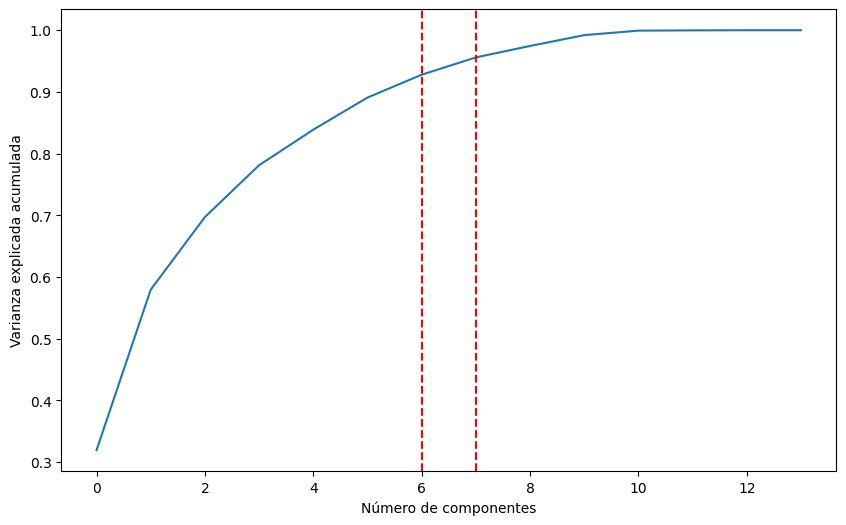

In [65]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axvline(x=index_90, color='r', linestyle='--')
plt.axvline(x=index_95, color='r', linestyle='--')
plt.show;

A partir de aprox. 7 componentes principales obtenemos una explicación de la varianza del 90% y de aprox. 8 componentes una explicación del 95%

Es posible validarlo:

In [66]:
variabilidad = 0.90
pca = PCA(n_components = variabilidad)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(f"Componentes necesarios para obtener una variabilidad explicada de al menos {variabilidad*100}% : {pca.n_components_} componentes")

variabilidad = 0.95
pca = PCA(n_components = variabilidad)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(f"Componentes necesarios para obtener una variabilidad explicada de al menos {variabilidad*100}% : {pca.n_components_} componentes")

Componentes necesarios para obtener una variabilidad explicada de al menos 90.0% : 7 componentes
Componentes necesarios para obtener una variabilidad explicada de al menos 95.0% : 8 componentes


Se utilizarán 8 componentes principales

In [67]:
num_components = 8
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Identificación componentes principales

In [68]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['disponibilidad_declarada',
 'gen_termica',
 'gen_no_termica',
 'vertimientos',
 'vol_util',
 'gen_no_termica',
 'disp_dec_termica',
 'vertimientos']

In [69]:
pd.DataFrame(pca.components_, columns = df.columns)

,demanda,disp_dec_hidraulica,disp_dec_no_termica,disp_dec_termica,disponibilidad_declarada,gen_hidraulica,gen_no_termica,gen_termica,generacion,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
0,-0.399481,0.423607,0.410732,0.183485,0.426186,-0.294610,-0.033714,0.020421,-0.390030,-0.030381,-0.039097,-0.080564,-0.165836,-0.007298
1,0.074225,-0.084155,0.002548,0.206486,-0.017431,-0.328933,0.189219,0.480794,0.064642,-0.333013,0.397204,-0.285392,0.367712,-0.282471
2,-0.324388,-0.174212,-0.162105,-0.474029,-0.276193,-0.287535,0.527067,-0.019226,-0.348482,-0.048848,-0.223252,-0.049318,0.006499,0.013100
3,-0.045234,0.047078,-0.038821,0.053566,0.066032,-0.158660,0.123879,0.158496,-0.040064,0.402659,0.290661,0.348978,0.392901,0.630064
4,-0.001324,-0.189202,0.008774,0.197303,-0.105867,-0.036219,-0.038551,0.034079,-0.019951,0.508409,-0.093004,-0.770097,-0.094789,0.201162
5,0.318424,0.173991,0.338177,0.034602,0.172191,0.151380,0.662197,0.046762,0.342675,-0.121144,-0.246360,-0.080726,-0.098365,0.224782
6,-0.125796,-0.245512,-0.280248,0.652695,-0.071544,-0.041932,0.025729,-0.063138,-0.119451,-0.412593,-0.325291,0.093176,-0.044855,0.326827
7,0.078436,-0.031736,0.099611,-0.352544,-0.110602,-0.150650,-0.320307,0.311259,0.070561,-0.379473,0.150590,-0.114782,-0.425081,0.508625


In [70]:
pd.DataFrame(pca.components_, columns = df.columns).max()

demanda                     0.318424
disp_dec_hidraulica         0.423607
disp_dec_no_termica         0.410732
disp_dec_termica            0.652695
disponibilidad_declarada    0.426186
gen_hidraulica              0.151380
gen_no_termica              0.662197
gen_termica                 0.480794
generacion                  0.342675
aportes_energia             0.508409
precio_oferta               0.397204
vol_util                    0.348978
indice_ONI                  0.392901
vertimientos                0.630064
dtype: float64

## Dataset final con las componentes principales

In [71]:
reduced_df = pd.DataFrame(data = X_pca, columns = [f"PC{i}" for i in range(len(most_important_names))])
reduced_df = pd.merge(reduced_df, p_bolsa, how = 'inner', left_index = True, right_index = True)
reduced_df.to_csv(os.path.join(abspath,"datasets", "procesado","4_dataset_PCA_completo.csv"), index=False)
reduced_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,precio_bolsa
0,4.678062,3.635445,5.381200,1.384905,-0.733759,0.516163,1.494741,-1.427306,120.501228
1,3.944833,3.693119,4.752538,1.284485,-0.780042,1.038051,1.274964,-1.332785,118.495340
2,4.162359,3.852866,4.846963,1.455118,-0.846715,0.620366,1.051027,-1.152572,121.160145
3,2.648713,3.775120,3.966380,1.139938,-0.883344,1.630648,0.659927,-0.948164,123.962937
4,2.284337,3.977695,3.836070,1.268172,-0.974723,2.220649,0.397560,-1.114114,120.666437


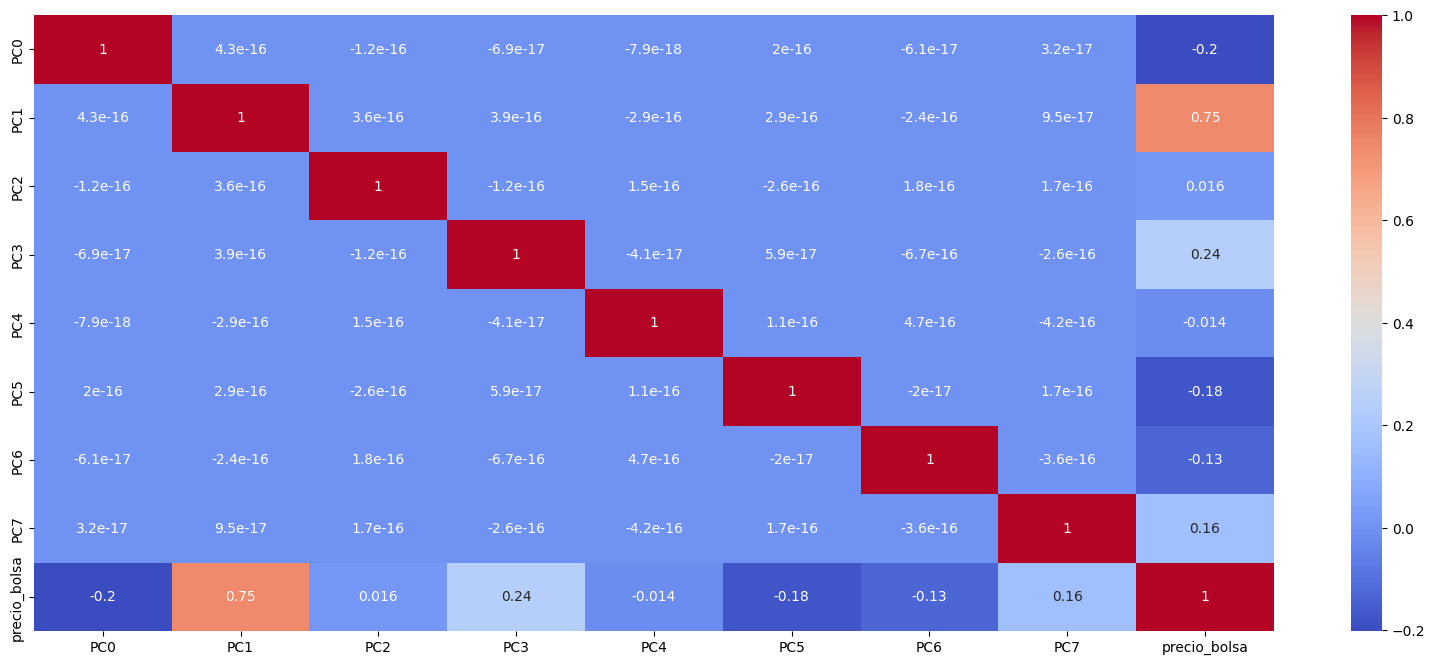

In [72]:
# Heatmap of correlation matrix
plt.figure(figsize = (20,8))
correlation_matrix = reduced_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Utilizando el Dataset filtrado

## Lectura

In [73]:
df = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "3_dataset_filtrado.csv"))
p_bolsa = df.precio_bolsa
df = df.drop(columns = ['precio_bolsa', 'fecha'])
df1 = df.copy()
print("Cantidad de características/features:", len(df.columns))
# df.head(3)

Cantidad de características/features: 11


## Estandarización de los datos

In [74]:
X = df.values # getting all values as a matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Aplicación

In [75]:
pca = PCA()
X_pca = pca.fit(X_std)

In [76]:
index_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.9)
index_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)

## Número de componentes vs Variabilidad explicada

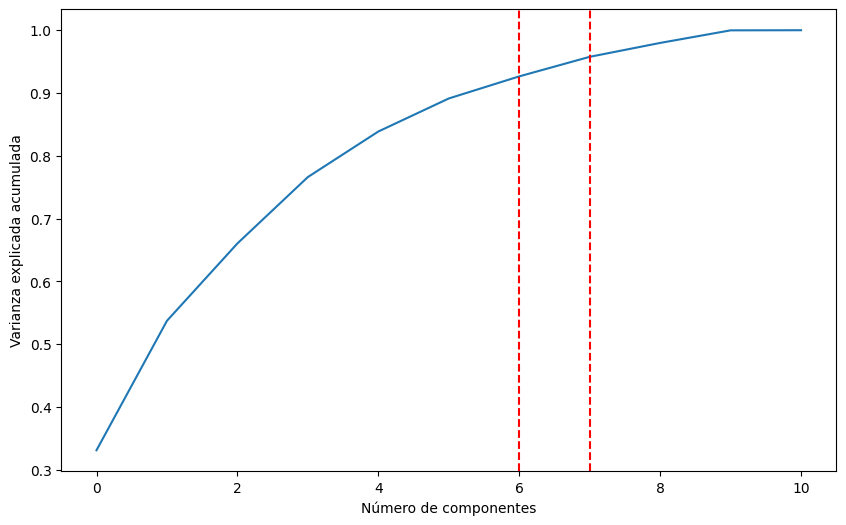

In [77]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axvline(x=index_90, color='r', linestyle='--')
plt.axvline(x=index_95, color='r', linestyle='--')
plt.show;

In [78]:
variabilidad = 0.90
pca = PCA(n_components = variabilidad)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(f"Componentes necesarios para obtener una variabilidad explicada de al menos {variabilidad*100}% : {pca.n_components_} componentes")

variabilidad = 0.95
pca = PCA(n_components = variabilidad)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(f"Componentes necesarios para obtener una variabilidad explicada de al menos {variabilidad*100}% : {pca.n_components_} componentes")

Componentes necesarios para obtener una variabilidad explicada de al menos 90.0% : 7 componentes
Componentes necesarios para obtener una variabilidad explicada de al menos 95.0% : 8 componentes


In [79]:
num_components = 8
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Identificación componentes principales

In [80]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['gen_termica',
 'demanda',
 'gen_no_termica',
 'vertimientos',
 'vol_util',
 'disp_dec_termica',
 'vertimientos',
 'disp_dec_hidraulica']

In [81]:
pd.DataFrame(pca.components_, columns = df.columns)

,demanda,disp_dec_hidraulica,disp_dec_termica,gen_hidraulica,gen_no_termica,gen_termica,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
0,0.025359,-0.043669,0.219226,-0.363577,0.189324,0.480269,-0.335030,0.388634,-0.292919,0.349297,-0.282150
1,-0.595969,0.562586,0.205887,-0.398255,-0.052693,-0.026773,-0.017981,-0.144169,-0.104711,-0.302800,0.008211
2,-0.215313,-0.174602,-0.563516,-0.226340,0.691302,-0.011147,-0.057920,-0.262565,-0.008733,0.027605,0.056740
3,-0.083189,0.096707,0.093759,-0.184747,0.098180,0.161334,0.414494,0.288215,0.326217,0.361578,0.642735
4,0.055470,-0.210096,0.159178,-0.001348,0.060934,0.030842,0.489216,-0.136436,-0.786972,-0.089546,0.193623
5,0.228731,0.034662,0.581958,0.157187,0.424518,-0.015385,-0.397364,-0.326113,0.064339,-0.103192,0.351582
6,-0.015591,-0.265438,-0.275524,-0.170605,-0.399221,0.248079,-0.445451,0.050578,-0.124854,-0.317858,0.534558
7,-0.471297,-0.576617,0.286111,-0.130450,-0.219385,-0.276920,-0.090669,-0.248561,0.085635,0.378172,-0.036729


## Dataset final con las componentes principales basado en el DataFrame filtrado

In [82]:
_df = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "2_dataset_procesado.csv"))

In [83]:
reduced_df = pd.DataFrame(data = X_pca, columns = [f"PC{i}" for i in range(len(most_important_names))])
reduced_df = pd.merge(reduced_df, p_bolsa, how = 'inner', left_index = True, right_index = True)
reduced_df.index = _df.fecha
reduced_df.to_csv(os.path.join(abspath,"datasets", "procesado","4_dataset_PCA_exc_features.csv"), index=True)
reduced_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,precio_bolsa
fecha,,,,,,,,,
2010-01-01,4.203538,3.565771,4.510770,1.345584,-0.627948,1.078003,-1.006162,1.445185,120.501228
2010-01-02,4.160252,2.920335,4.233935,1.235097,-0.609312,1.287115,-1.051695,1.014595,118.495340
2010-01-03,4.349066,3.062140,4.175426,1.408133,-0.733180,0.869889,-0.888278,0.989648,121.160145
2010-01-04,4.076867,1.784141,3.933963,1.067841,-0.635992,1.248735,-0.909209,0.293162,123.962937
2010-01-05,4.227628,1.394444,4.084858,1.172538,-0.644346,1.478602,-1.240434,-0.174062,120.666437


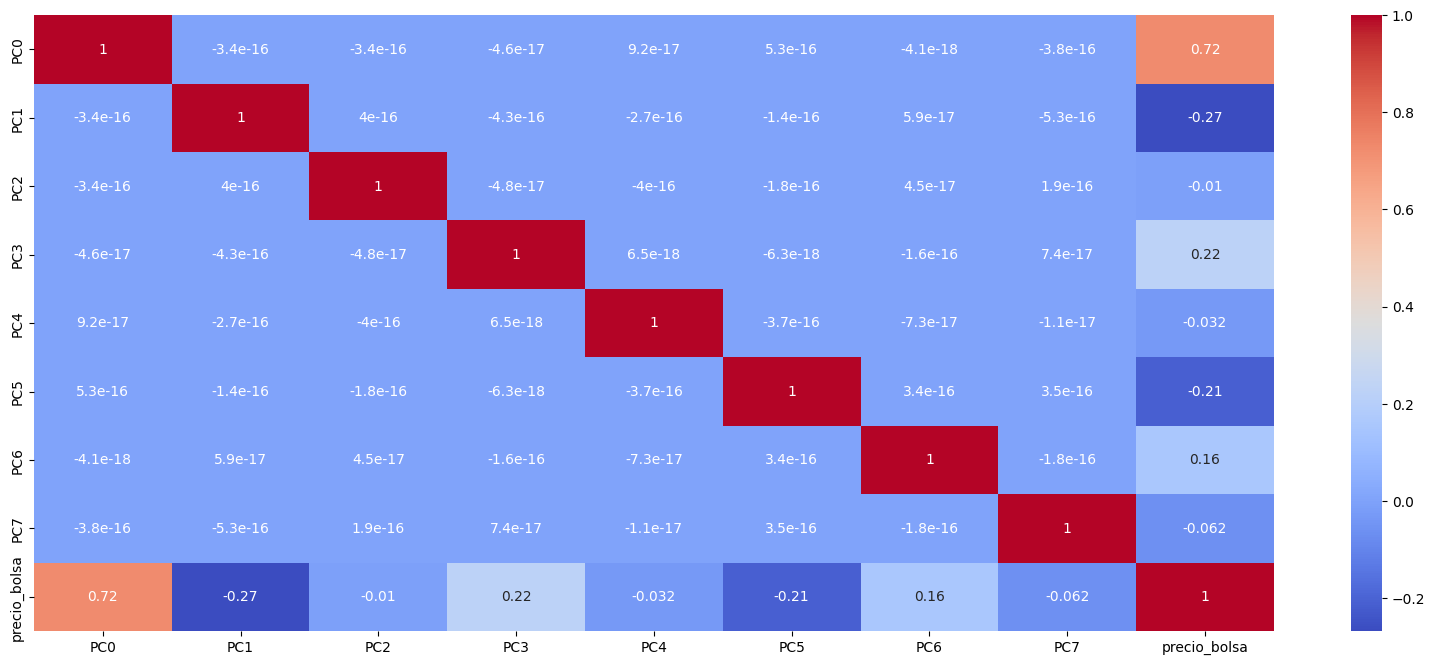

In [84]:
# Heatmap of correlation matrix
plt.figure(figsize = (20,8))
correlation_matrix = reduced_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()